In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
bitcoin_df = pd.read_csv('dataset/btc_prices.csv')

In [5]:
bitcoin_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [7]:
bitcoin_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [8]:
bitcoin_df.shape

(4857377, 8)

In [9]:
# Check number of NaN values
bitcoin_df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [10]:
# Remove the rows that contains NaN
bitcoin_df = bitcoin_df.dropna()
bitcoin_df.shape

(3613769, 8)

In [11]:
# Format the Timestamp and make it readible
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Timestamp'], unit='s')

Text(0, 0.5, 'Price in USD')

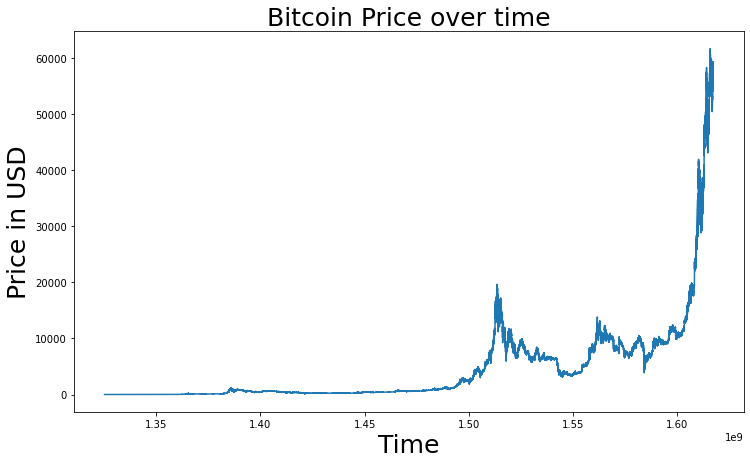

In [12]:
# Plot how Bitcoin's price has changed with time
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_df["Timestamp"], bitcoin_df["Weighted_Price"])
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time",size=25)
plt.ylabel("Price in USD", size=25)

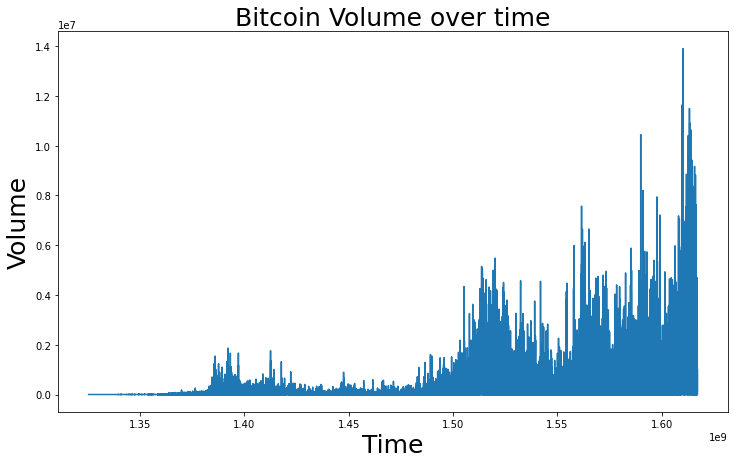

In [13]:
# Plot how Bitcoin's volume has changed with time
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_df["Timestamp"], bitcoin_df["Volume_(Currency)"])
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=25)
plt.ylabel("Volume", size=25);

In [14]:
# Choose our target value
features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
target = 'Close'

In [15]:
# Split our dataset between testing and training
x_train, x_test, y_train, y_test = train_test_split(bitcoin_df[features],bitcoin_df[target],test_size = 0.3)

In [16]:
# Create our model using Linear Regression
composite_pipeline = make_pipeline(StandardScaler(with_mean=False), LinearRegression(fit_intercept=False))
linear_model = composite_pipeline.fit(x_train, y_train)

In [17]:
# Calculate our model's score
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.9999993630600416


In [18]:
future_set = bitcoin_df.shift(periods=30).tail(30)

In [19]:
prediction = model.predict(future_set[features])

NameError: name 'model' is not defined

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin_df["Timestamp"][-400:-60], bitcoin_df["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=25)
plt.ylabel("Price in USD", size=25)

In [ ]:
# df_pred_actual = pd.DataFrame({'predicted': prediction, 'actual': bitcoin_df["Weighted_Price"].tail(30)})
# df_pred_actual